In [2]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# Ìè∞Ìä∏ Îì±Î°ù Î∞è matplotlib ÏÑ§Ï†ï
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å
import warnings
warnings.filterwarnings('ignore')

#Ï†ÄÏû•ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# ÌëúÏ§ÄÌôî
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎààÎã§.
from sklearn.model_selection import train_test_split

import os

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñê·Ö©·Ü´/data/total.parquet')
df

event_time event_type  product_id  \
0         2019-10-01 00:00:00+00:00       view    44600062   
1         2019-10-01 00:00:00+00:00       view     3900821   
2         2019-10-01 00:00:01+00:00       view    17200506   
3         2019-10-01 00:00:01+00:00       view     1307067   
4         2019-10-01 00:00:04+00:00       view     1004237   
...                             ...        ...         ...   
345120463 2020-03-31 23:59:55+00:00       view     1005212   
345120464 2020-03-31 23:59:55+00:00       view     1701027   
345120465 2020-03-31 23:59:56+00:00       view     2601488   
345120466 2020-03-31 23:59:56+00:00       view   100006963   
345120467 2020-03-31 23:59:57+00:00       view   100145166   

                   category_id                        category_code     brand  \
0          2103807459595387724                                 None  shiseido   
1          2053013552326770905  appliances.environment.water_heater      aqua   
2          2053013559792632471           furniture.living_room.sofa      None   
3          2053013558920217191                   computers.notebook    lenovo   
4          2053013555631882655               electronics.smartphone     apple   
...                        ...                                  ...       ...   
345120463  2232732093077520756             construction.tools.light   samsung   
345120464  2232732099981345295         appliances.personal.massager   samsung   
345120465  2232732101835227701                                 None    darina   
345120466  2232732099754852875         appliances.personal.massager     yasin   
345120467  2232732076711346189                                 None      None   

             price    user_id                          user_session  \
0            35.79  541312140  72d76fde-8bb3-4e00-8c23-a032dfed738c   
1            33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc   
2           543.10  519107250  566511c2-e2e3-422b-b695-cf8e6e792ca8   
3           251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713   
4          1081.98  535871217  c6bd7419-2748-4c56-95b4-8cec9ff8b80d   
...            ...        ...                                   ...   
345120463   178.12  516506125  cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24   
345120464   154.42  572260610  2e16ffb5-996f-40d3-b98e-ddc53b546357   
345120465   167.29  523607693  6836d271-ef67-42dc-8756-4ef103e4fbf1   
345120466   163.16  629229484  c00a1636-dfc2-4e96-a6a3-7fd979e93789   
345120467    85.95  513238692  d33201ea-2f9d-4957-97fd-1efe9a315805   

          event_date  event_hour category_lvl1 category_lvl2 category_lvl3  \
0         2019-10-01           0          None          None          None   
1         2019-10-01           0    appliances   environment  water_heater   
2         2019-10-01           0     furniture   living_room          sofa   
3         2019-10-01           0     computers      notebook          None   
4         2019-10-01           0   electronics    smartphone          None   
...              ...         ...           ...           ...           ...   
345120463 2020-03-31          23  construction         tools         light   
345120464 2020-03-31          23    appliances      personal      massager   
345120465 2020-03-31          23          None          None          None   
345120466 2020-03-31          23    appliances      personal      massager   
345120467 2020-03-31          23          None          None          None   

          category_lvl4  
0                  None  
1                  None  
2                  None  
3                  None  
4                  None  
...                 ...  
345120463          None  
345120464          None  
345120465          None  
345120466          None  
345120467          None  

[345120468 rows x 15 columns]

# ‚úÖ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Íµ¨Îß§Ïú® ÎπÑÍµê(ÌååÏù¥, ÎßâÎåÄ)

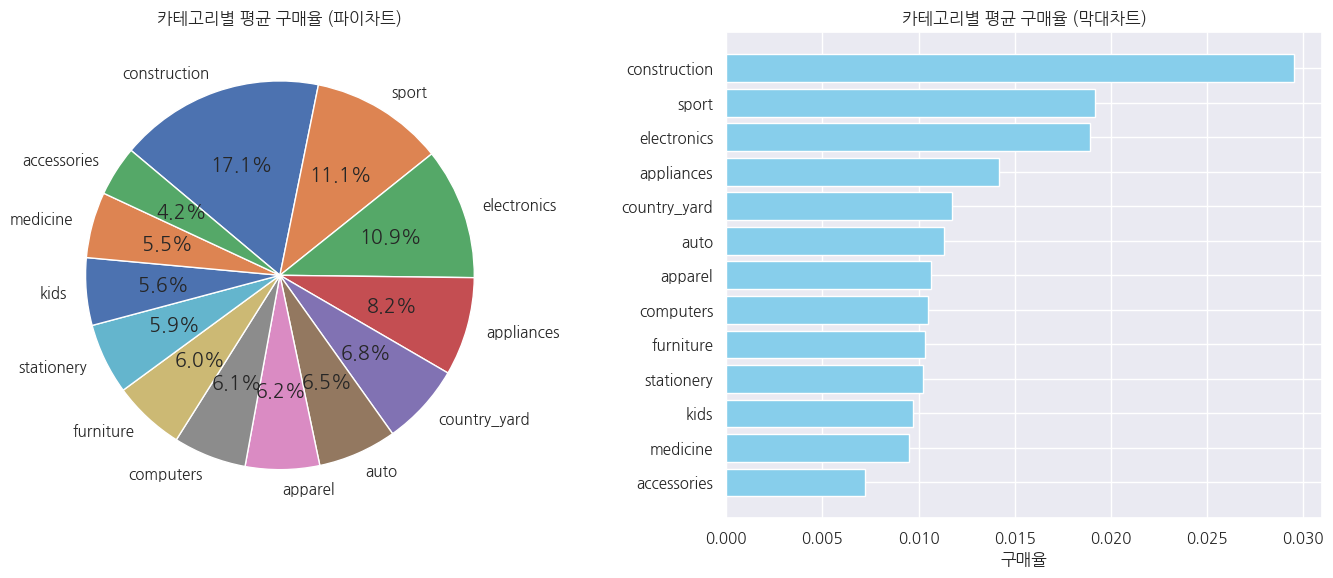

In [15]:
# 1. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Íµ¨Îß§Ïú® Í≥ÑÏÇ∞
# Íµ¨Îß§Ïú® = Íµ¨Îß§ Ïàò / Ï†ÑÏ≤¥ Ïàò (Ïú†Ï†Ä Îã®ÏúÑ or Ïù¥Î≤§Ìä∏ Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞ Î∞©Ïãù Ï°∞Ï†ï Í∞ÄÎä•)
category_stats = df.groupby('category_lvl1')['event_type'].apply(lambda x: (x == 'purchase').mean()).reset_index(name='purchase_rate')
category_stats = category_stats.sort_values('purchase_rate', ascending=False)

# 2. ÏãúÍ∞ÅÌôî (Ï¢å: ÌååÏù¥, Ïö∞: ÎßâÎåÄ)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ‚ñ∂ ÌååÏù¥Ï∞®Ìä∏
axes[0].pie(
    category_stats['purchase_rate'],
    labels=category_stats['category_lvl1'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
axes[0].set_title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Íµ¨Îß§Ïú® (ÌååÏù¥Ï∞®Ìä∏)')

# ‚ñ∂ ÎßâÎåÄÏ∞®Ìä∏
axes[1].barh(
    category_stats['category_lvl1'],
    category_stats['purchase_rate'],
    color='skyblue'
)
axes[1].invert_yaxis()  # ÎÜíÏùÄ Íµ¨Îß§Ïú®Ïù¥ ÏúÑÎ°ú
axes[1].set_title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Íµ¨Îß§Ïú® (ÎßâÎåÄÏ∞®Ìä∏)')
axes[1].set_xlabel('Íµ¨Îß§Ïú®')

plt.tight_layout()
plt.show()

In [17]:
# ÏÑ∏ÏÖòÎ≥ÑÎ°ú Ïñ¥Îñ§ Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌñàÎäîÏßÄ ÏßëÍ≥Ñ
session_event_counts = df.groupby('user_session')['event_type'].unique().reset_index()

# viewÎäî Ìè¨Ìï®ÌïòÍ≥†, purchaseÎèÑ Ìè¨Ìï®Îêú ÏÑ∏ÏÖò
session_event_counts['has_view'] = session_event_counts['event_type'].apply(lambda x: 'view' in x)
session_event_counts['has_purchase'] = session_event_counts['event_type'].apply(lambda x: 'purchase' in x)

# viewÍ∞Ä ÏûàÎäî ÏÑ∏ÏÖò Ï§ë purchaseÎèÑ ÏûàÎäî ÎπÑÏú® Í≥ÑÏÇ∞
view_sessions = session_event_counts[session_event_counts['has_view']]
converted_sessions = view_sessions[view_sessions['has_purchase']]

conversion_rate = len(converted_sessions) / len(view_sessions) * 100

print(f"üìä View ‚Üí Purchase Ï†ÑÌôòÏú®: {conversion_rate:.2f}%")

KeyboardInterrupt: 

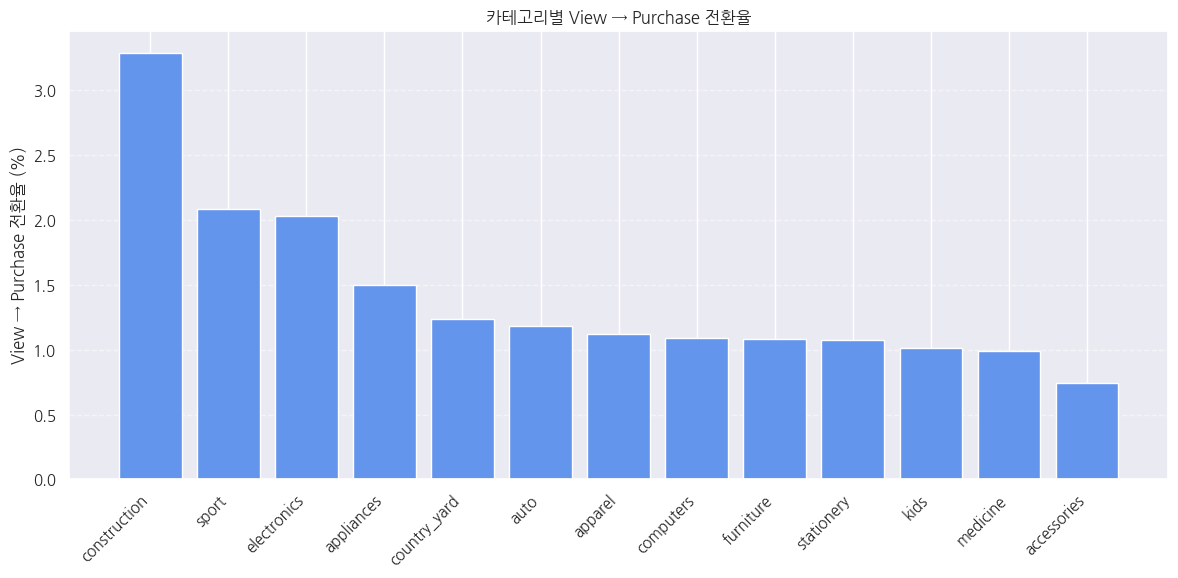

In [18]:
# (1) view Ïàò ÏßëÍ≥Ñ
view_counts = df[df['event_type'] == 'view'].groupby('category_lvl1').size().reset_index(name='view_count')

# (2) purchase Ïàò ÏßëÍ≥Ñ
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size().reset_index(name='purchase_count')

# (3) Î≥ëÌï© ÌõÑ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_df = pd.merge(view_counts, purchase_counts, on='category_lvl1', how='inner')
conversion_df['conversion_rate'] = (conversion_df['purchase_count'] / conversion_df['view_count']) * 100

# (4) Ï†ïÎ†¨
conversion_df = conversion_df.sort_values('conversion_rate', ascending=False)

# (5) ÏãúÍ∞ÅÌôî (ÎßâÎåÄ Ï∞®Ìä∏)
plt.figure(figsize=(12, 6))
plt.bar(conversion_df['category_lvl1'], conversion_df['conversion_rate'], color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('View ‚Üí Purchase Ï†ÑÌôòÏú® (%)')
plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ View ‚Üí Purchase Ï†ÑÌôòÏú®')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


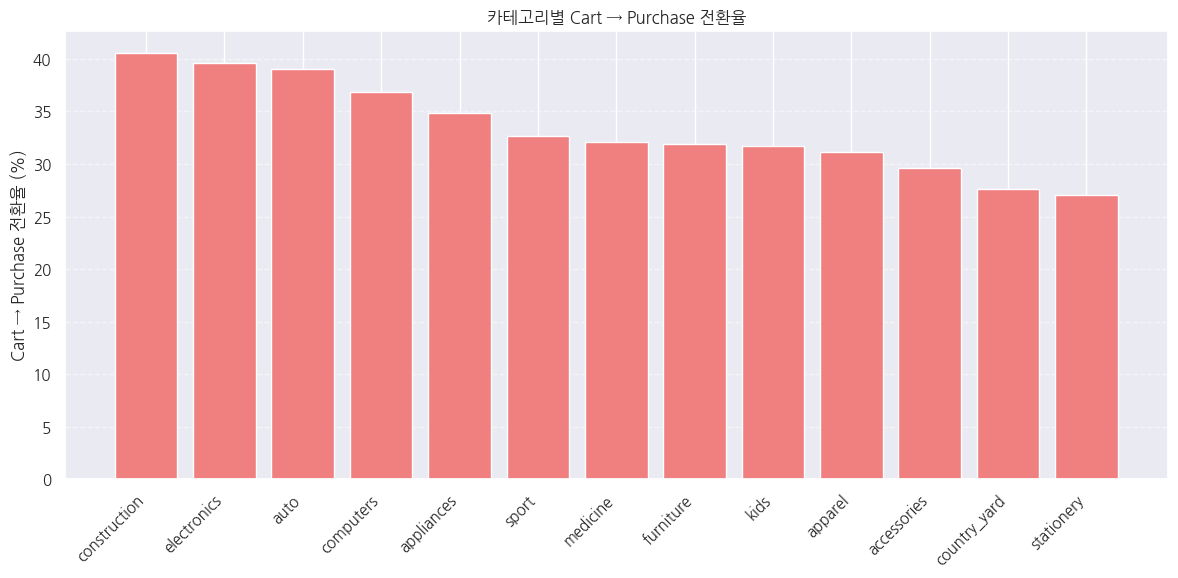

In [19]:
# (1) cart Ïàò ÏßëÍ≥Ñ
cart_counts = df[df['event_type'] == 'cart'].groupby('category_lvl1').size().reset_index(name='cart_count')

# (2) purchase Ïàò ÏßëÍ≥Ñ
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size().reset_index(name='purchase_count')

# (3) Î≥ëÌï©
conversion_df = pd.merge(cart_counts, purchase_counts, on='category_lvl1', how='inner')

# (4) Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_df['conversion_rate'] = (conversion_df['purchase_count'] / conversion_df['cart_count']) * 100

# (5) Ï†ïÎ†¨
conversion_df = conversion_df.sort_values('conversion_rate', ascending=False)

# (6) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.bar(conversion_df['category_lvl1'], conversion_df['conversion_rate'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cart ‚Üí Purchase Ï†ÑÌôòÏú® (%)')
plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Cart ‚Üí Purchase Ï†ÑÌôòÏú®')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ‚úÖ ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Íµ¨Îß§ ÌòÑÌô©

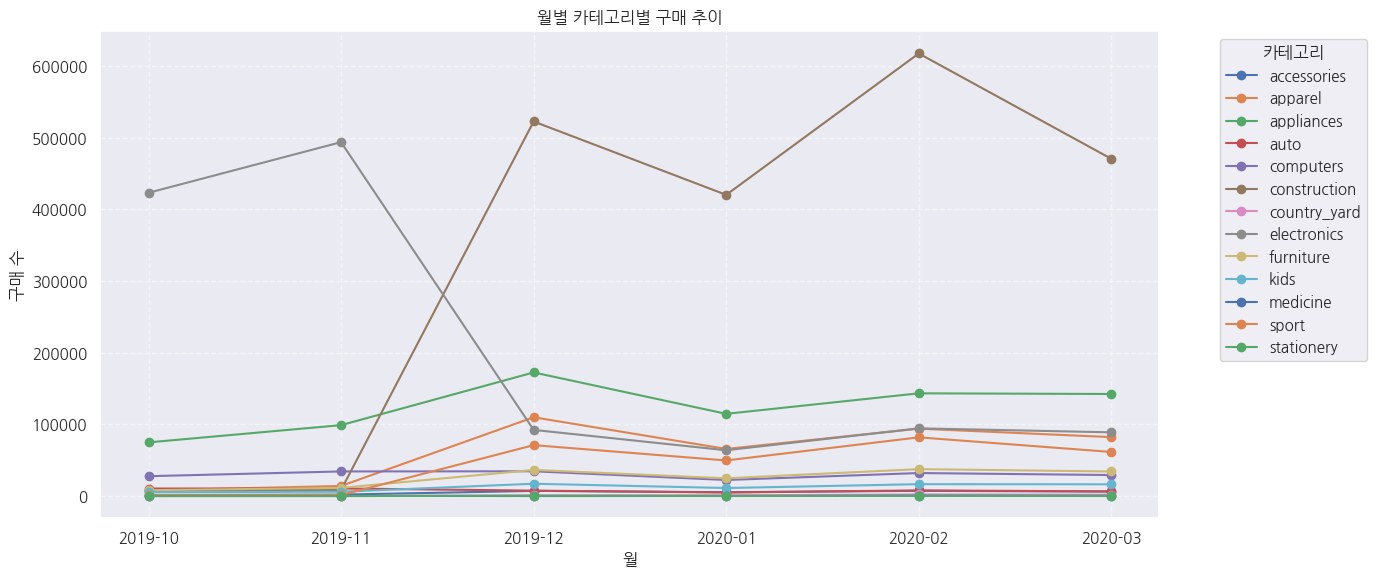

In [20]:
# 1. purchase Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. Ïõî Ï†ïÎ≥¥ Ï∂îÏ∂ú
df_purchase['purchase_month'] = df_purchase['event_time'].dt.to_period('M').astype(str)

# 3. ÏõîÎ≥Ñ √ó Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Íµ¨Îß§ Ïàò ÏßëÍ≥Ñ
monthly_category_sales = df_purchase.groupby(['purchase_month', 'category_lvl1']).size().reset_index(name='purchase_count')

# 4. ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò
pivot_table = monthly_category_sales.pivot(index='purchase_month', columns='category_lvl1', values='purchase_count').fillna(0)

# 5. ÏãúÍ∞ÅÌôî
pivot_table.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Íµ¨Îß§ Ï∂îÏù¥')
plt.xlabel('Ïõî')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Ïπ¥ÌÖåÍ≥†Î¶¨', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ‚úÖ ÌïúÎ≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ùÏùò ÌñâÎèô Ìå®ÌÑ¥

In [21]:
# 1. 1ÌöåÎßå Íµ¨Îß§Ìïú Ïú†Ï†Ä ÏãùÎ≥Ñ
purchase_users = df[df['event_type'] == 'purchase']['user_id']
purchase_counts = purchase_users.value_counts()
one_time_buyers = purchase_counts[purchase_counts == 1].index

# 2. Ìï¥Îãπ Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
df_one_time = df[df['user_id'].isin(one_time_buyers)].copy()

# 3. Ïπ¥ÌÖåÍ≥†Î¶¨, ÏÑ∏ÏÖò Îã®ÏúÑ Ï†ïÎ†¨
df_one_time = df_one_time.sort_values(by=['user_id', 'user_session', 'category_lvl1', 'event_time'])

# 4. Ïù¥Î≤§Ìä∏Î≥Ñ ÏãúÍ∞Ñ Ï†ÄÏû•
def get_transition_times(group):
    view_time = group[group['event_type'] == 'view']['event_time'].min()
    cart_time = group[group['event_type'] == 'cart']['event_time'].min()
    purchase_time = group[group['event_type'] == 'purchase']['event_time'].min()

    return pd.Series({
        'view_to_cart_sec': (cart_time - view_time).total_seconds() if pd.notnull(view_time) and pd.notnull(cart_time) else None,
        'cart_to_purchase_sec': (purchase_time - cart_time).total_seconds() if pd.notnull(purchase_time) and pd.notnull(cart_time) else None
    })

# 5. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ, ÏÑ∏ÏÖòÎ≥Ñ ÏãúÍ∞Ñ Í≥ÑÏÇ∞
transition_times = df_one_time.groupby(['user_id', 'user_session', 'category_lvl1']).apply(get_transition_times).reset_index()

# 6. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÏãúÍ∞Ñ Í≥ÑÏÇ∞
category_avg_time = transition_times.groupby('category_lvl1')[['view_to_cart_sec', 'cart_to_purchase_sec']].mean().dropna()

# 7. Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
print(category_avg_time.sort_values('view_to_cart_sec'))

KeyboardInterrupt: 

In [ ]:
category_avg_time.plot(kind='bar', figsize=(12, 6))
plt.title('1Ìöå Íµ¨Îß§ Í≥†Í∞ùÏùò Îã®Í≥ÑÎ≥Ñ ÏÜåÏöî ÏãúÍ∞Ñ (Ï¥à)')
plt.ylabel('ÏÜåÏöî ÏãúÍ∞Ñ (Ï¥à)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
